In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [2]:
import io
train = pd.read_csv(r'C:\Users\Dell\Downloads\GUVI Assignments\DW22 Insta influencers\top_insta_influencers_data.csv')

In [3]:
train.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [5]:
train.columns

Index(['rank', 'channel_info', 'influence_score', 'posts', 'followers',
       'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes',
       'country'],
      dtype='object')

In [6]:
train=train.set_index('rank')

In [7]:
train

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
rank,,,,,,,,,
1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...
196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil


In [8]:
Post=list(train['posts'])
Post1=list()
for num in Post:
    if 'k' in num:
        new_num=1000*float(num.replace('k',''))
        Post1.append(new_num)
    else:
        Post1.append(float(num))
train['posts']=Post1

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   channel_info       200 non-null    object 
 1   influence_score    200 non-null    int64  
 2   posts              200 non-null    float64
 3   followers          200 non-null    object 
 4   avg_likes          200 non-null    object 
 5   60_day_eng_rate    200 non-null    object 
 6   new_post_avg_like  200 non-null    object 
 7   total_likes        200 non-null    object 
 8   country            138 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 15.6+ KB


In [10]:
train.describe()

,influence_score,posts
count,200.000000,200.000000
mean,81.820000,3499.850000
std,8.878159,3475.828158
min,22.000000,10.000000
25%,80.000000,947.500000
50%,84.000000,2100.000000
75%,86.000000,5025.000000
max,93.000000,17500.000000


In [11]:
train.columns

Index(['channel_info', 'influence_score', 'posts', 'followers', 'avg_likes',
       '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'country'],
      dtype='object')

In [12]:
train

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
rank,,,,,,,,,
1,cristiano,92,3300.0,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
2,kyliejenner,91,6900.0,366.2m,8.3m,1.62%,5.9m,57.4b,United States
3,leomessi,90,890.0,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
4,selenagomez,93,1800.0,342.7m,6.2m,0.97%,3.3m,11.5b,United States
5,therock,91,6800.0,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...
196,iambeckyg,71,2300.0,33.2m,623.8k,1.40%,464.7k,1.4b,United States
197,nancyajram,81,3800.0,33.2m,390.4k,0.64%,208.0k,1.5b,France
198,luansantana,79,770.0,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil


In [15]:

followers=list(train['followers'])
followers1=list()
for num in followers:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        followers1.append(new_num)
    else:
        followers1.append(float(num))
train['followers']=followers1

avg_likes=list(train['avg_likes'])
avg_likes1=list()
for num in avg_likes:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        avg_likes1.append(new_num)
    else:
        new_num=1000*float(num.replace('k',''))
        avg_likes1.append(new_num)
train['avg_likes']=avg_likes1

new_post_avg_like=list(train['new_post_avg_like'])  
new_post_avg_like1=list()
for num in new_post_avg_like:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        new_post_avg_like1.append(new_num)    
    else:
        new_num=1000*float(num.replace('k',''))
        new_post_avg_like1.append(new_num)
train['new_post_avg_like']=new_post_avg_like1

total_likes=list(train['total_likes']) 
total_likes1=list()
for num in total_likes:
    if 'b' in num:
        new_num=1000000000*float(num.replace('b',''))
        total_likes1.append(new_num)
    else:
        new_num=1000000*float(num.replace('m',''))
        total_likes1.append(new_num)
train['total_likes']=total_likes1

day_eng_rate=list(train['60_day_eng_rate'])
day_eng_rate1=list()
for num in day_eng_rate:
    if '%' in num:
        new_num=float(num.replace('%',''))
        day_eng_rate1.append(new_num)
    else:
        new_num=float(num)
        day_eng_rate1.append(new_num)
train['60_day_eng_rate']=day_eng_rate1

In [16]:
train.columns

Index(['channel_info', 'influence_score', 'posts', 'followers', 'avg_likes',
       '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'country'],
      dtype='object')

In [18]:
train[['followers', 'avg_likes','60_day_eng_rate','new_post_avg_like','total_likes']] = train[['followers', 'avg_likes','60_day_eng_rate','new_post_avg_like','total_likes']].astype('float64')

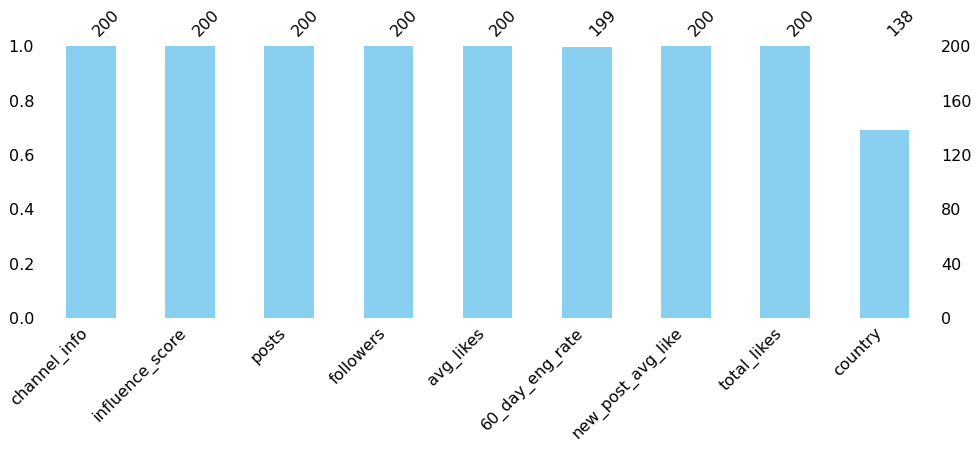

In [19]:
msno.bar(train, figsize = (16,5),color = "#89CFF0")
plt.show()

In [20]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'channel_info' has '200' unique values
Feature 'influence_score' has '32' unique values
Feature 'posts' has '99' unique values
Feature 'followers' has '165' unique values
Feature 'avg_likes' has '135' unique values
Feature '60_day_eng_rate' has '147' unique values
Feature 'new_post_avg_like' has '162' unique values
Feature 'total_likes' has '116' unique values
Feature 'country' has '26' unique values


In [22]:
train['country'].unique()

array(['Spain', 'United States', nan, 'Canada', 'Brazil', 'Netherlands',
       'United Kingdom', 'India', 'Uruguay', 'Turkey', 'Indonesia',
       'Colombia', 'France', 'Australia', 'Italy', 'United Arab Emirates',
       'Puerto Rico', "CÃ´te d'Ivoire", 'Anguilla', 'Switzerland',
       'Sweden', 'British Virgin Islands', 'Czech Republic', 'Mexico',
       'Germany', 'Russia'], dtype=object)

In [23]:
train.columns

Index(['channel_info', 'influence_score', 'posts', 'followers', 'avg_likes',
       '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'country'],
      dtype='object')

In [26]:
correlation = train.corr()
print(correlation)
print(correlation['total_likes'].sort_values(ascending = False),'\n')

                   influence_score     posts  followers  avg_likes  \
influence_score           1.000000  0.160068   0.367713   0.051478   
posts                     0.160068  1.000000   0.060398  -0.343087   
followers                 0.367713  0.060398   1.000000   0.349195   
avg_likes                 0.051478 -0.343087   0.349195   1.000000   
60_day_eng_rate          -0.081891 -0.324068  -0.100905   0.754587   
new_post_avg_like         0.036548 -0.290080   0.300914   0.845978   
total_likes               0.237675  0.233328   0.667539   0.357940   

                   60_day_eng_rate  new_post_avg_like  total_likes  
influence_score          -0.081891           0.036548     0.237675  
posts                    -0.324068          -0.290080     0.233328  
followers                -0.100905           0.300914     0.667539  
avg_likes                 0.754587           0.845978     0.357940  
60_day_eng_rate           1.000000           0.869202    -0.019524  
new_post_avg_like        

Index(['total_likes', 'followers', 'avg_likes', 'new_post_avg_like',
       'influence_score', 'posts', '60_day_eng_rate'],
      dtype='object')


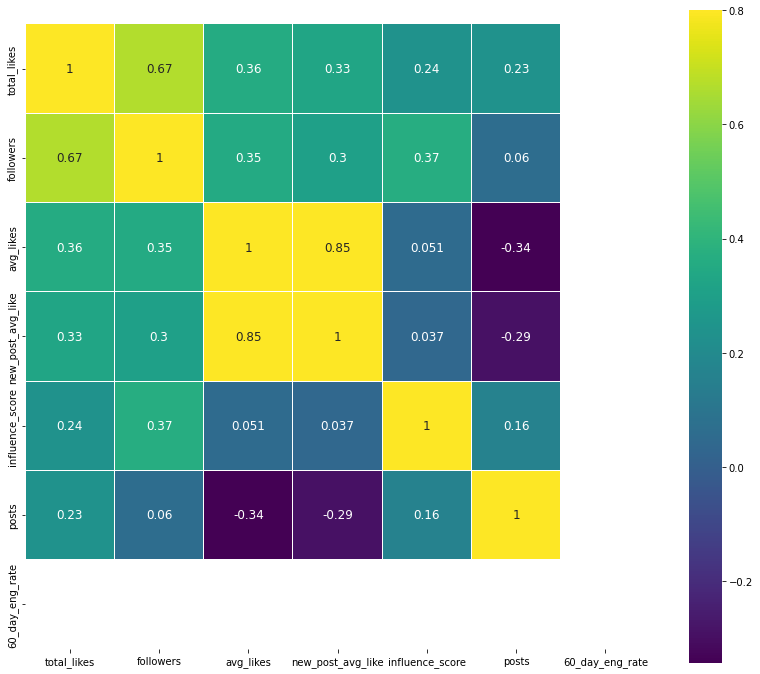

In [27]:
k= 10
cols = correlation.nlargest(k,'total_likes')['total_likes'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

In [28]:
# from the above heatmap we can see that the total likes is dependent on number of followers and average nuber of likes

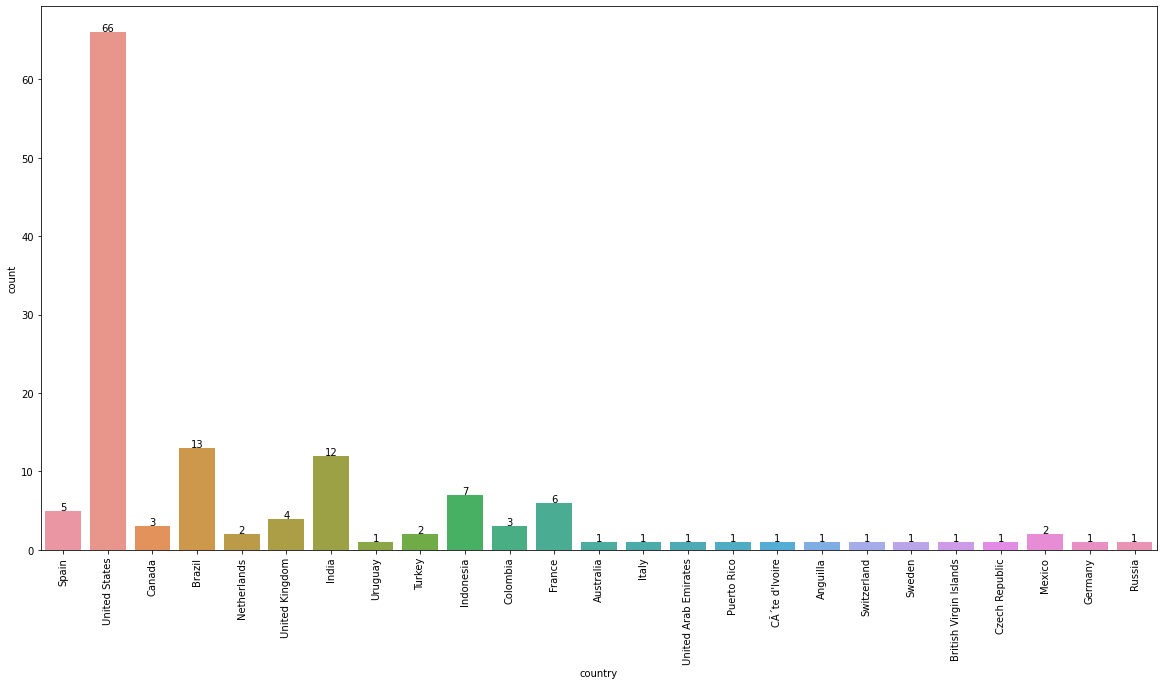

In [29]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x = 'country' , data = train)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [32]:
import os
import wandb
import warnings

In [34]:
train.columns

Index(['channel_info', 'influence_score', 'posts', 'followers', 'avg_likes',
       '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'country'],
      dtype='object')

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [45]:
train['Number']=1
data1b=train[['country','Number']]
data1b=data1b.groupby('country',as_index=False)['Number'].sum()
data1b=data1b.sort_values('Number',ascending=False)
data1b = data1b.reset_index()
data1b = data1b.drop('index', axis=1)
display(data1b[0:5])
fig = px.bar(data1b[:30], x='country', y='Number',title="Number of Influencers by Country or Region")
fig.show()

,country,Number
0,United States,66
1,Brazil,13
2,India,12
3,Indonesia,7
4,France,6


In [47]:
# The above bar graph displays that most number of influencers are from United Nations

In [48]:
train.columns

Index(['channel_info', 'influence_score', 'posts', 'followers', 'avg_likes',
       '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'country',
       'Number'],
      dtype='object')

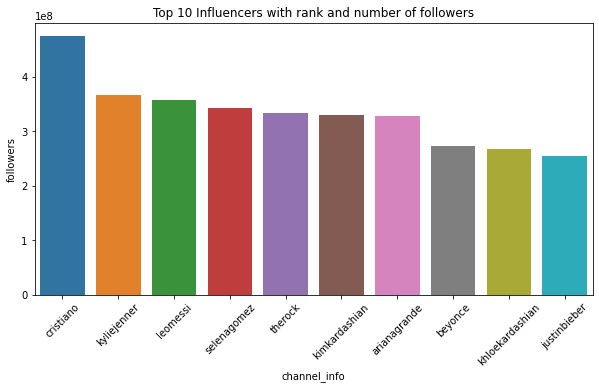

In [50]:
plt.figure(figsize=(10,5 ))
plt.title("Top 10 Influencers with rank and number of followers")
ax=sns.barplot(data=train.head(10), x="channel_info",y="followers")
plt.xticks(rotation='45')
# show the graph
plt.show()

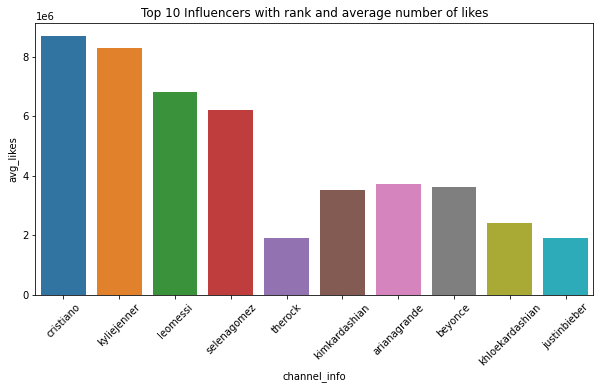

In [51]:
plt.figure(figsize=(10,5 ))
plt.title("Top 10 Influencers with rank and average number of likes")
ax=sns.barplot(data=train.head(10), x="channel_info",y="avg_likes")
plt.xticks(rotation='45')
# show the graph
plt.show()

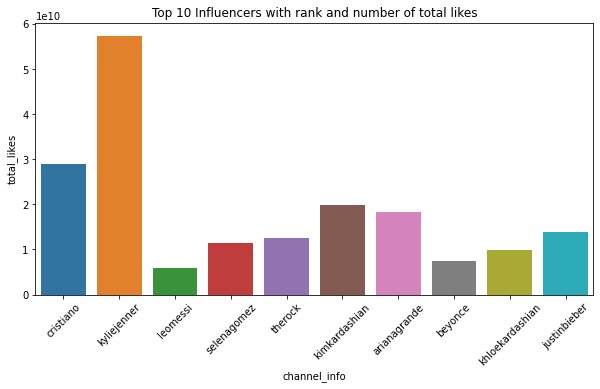

In [52]:
plt.figure(figsize=(10,5 ))
plt.title("Top 10 Influencers with rank and number of total likes")
ax=sns.barplot(data=train.head(10), x="channel_info",y="total_likes")
plt.xticks(rotation='45')
# show the graph
plt.show()

In [53]:
train.columns

Index(['channel_info', 'influence_score', 'posts', 'followers', 'avg_likes',
       '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'country',
       'Number'],
      dtype='object')

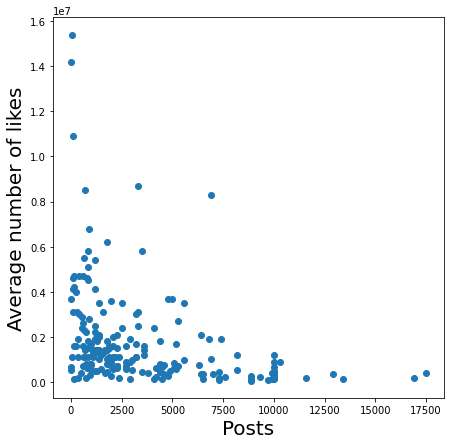

In [56]:
fig,ax = plt.subplots(figsize=(7,7))
ax.set_xlabel('Posts',fontsize=20)
ax.set_ylabel('Average number of likes',fontsize=20)
ax.scatter(train['posts'],train['avg_likes'])
plt.show()

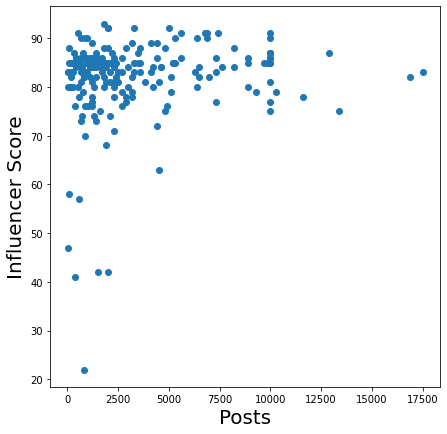

In [57]:
fig,ax = plt.subplots(figsize=(7,7))
ax.set_xlabel('Posts',fontsize=20)
ax.set_ylabel('Influencer Score',fontsize=20)
ax.scatter(train['posts'],train['influence_score'])
plt.show()

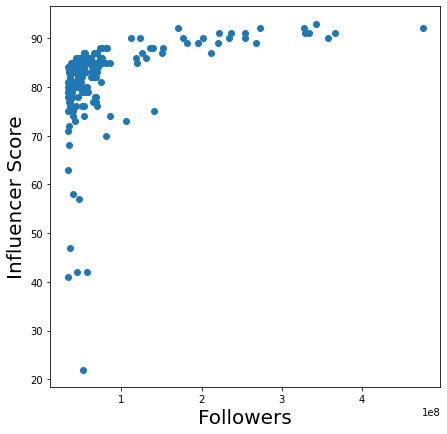

In [61]:
fig,ax = plt.subplots(figsize=(7,7))
ax.set_xlabel('Followers',fontsize=20)
ax.set_ylabel('Influencer Score',fontsize=20)
ax.scatter(train['followers'],train['influence_score'])
plt.show()

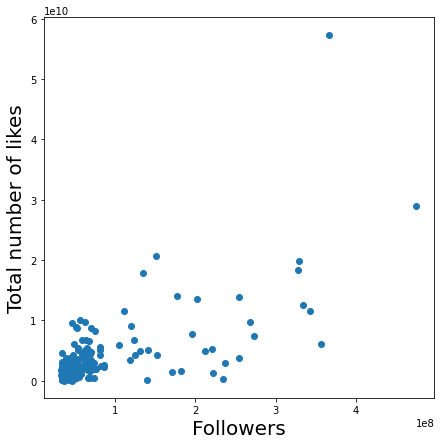

In [71]:
fig,ax = plt.subplots(figsize=(7,7))
ax.set_xlabel('Followers',fontsize=20)
ax.set_ylabel('Total number of likes',fontsize=20)
ax.scatter(train['followers'],train['total_likes'])
plt.show()

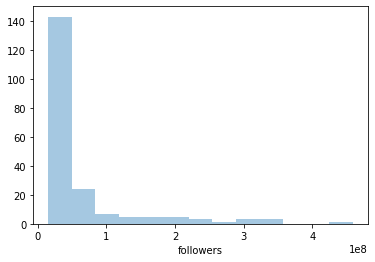

In [63]:
sns.distplot(train['followers'],bins="doane",kde=False,hist_kws={"align" : "left"})
plt.show()

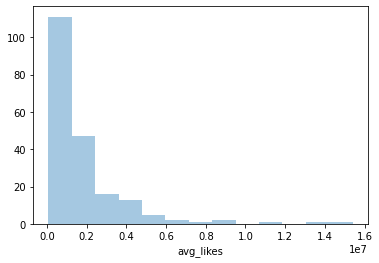

In [69]:
sns.distplot(train['avg_likes'],bins="doane",kde=False)
plt.show()

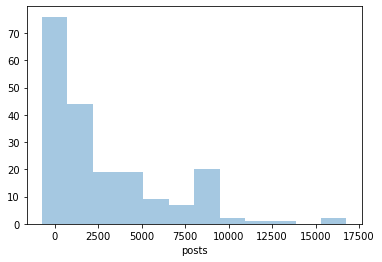

In [70]:
sns.distplot(train['posts'],bins="doane",kde=False,hist_kws={"align" : "left"})
plt.show()